In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Introduction

We begin by initializing a pandas dataframe from the nba_games.csv file and sorting the rows to be in chronological order. We also observe that the frame has 17772 rows and 151 columns and then list each column in the set.

In [2]:
df = pd.read_csv('nba_games.csv', index_col=0)
df

,mp,mp.1,fg,fga,fg%,3p,3pa,3p%,ft,fta,...,tov%_max_opp,usg%_max_opp,ortg_max_opp,drtg_max_opp,team_opp,total_opp,home_opp,season,date,won
0,240.0,240.0,39.0,81.0,0.481,6.0,20.0,0.300,14.0,18.0,...,22.8,29.0,178.0,111.0,DAL,95,1,2016,2015-12-09,True
1,240.0,240.0,36.0,100.0,0.360,7.0,31.0,0.226,16.0,19.0,...,50.0,32.6,152.0,111.0,ATL,98,0,2016,2015-12-09,False
2,240.0,240.0,37.0,85.0,0.435,8.0,19.0,0.421,17.0,23.0,...,20.0,30.9,148.0,116.0,SAS,107,1,2018,2017-10-18,False
3,240.0,240.0,41.0,89.0,0.461,8.0,21.0,0.381,17.0,19.0,...,28.6,30.9,138.0,118.0,MIN,99,0,2018,2017-10-18,True
4,240.0,240.0,27.0,86.0,0.314,6.0,26.0,0.231,15.0,20.0,...,16.8,30.9,157.0,90.0,MEM,92,1,2021,2021-04-30,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17767,240.0,240.0,35.0,81.0,0.432,11.0,26.0,0.423,27.0,36.0,...,34.2,33.7,160.0,118.0,OKC,92,0,2019,2018-10-19,True
17768,240.0,240.0,37.0,74.0,0.500,13.0,25.0,0.520,26.0,37.0,...,25.0,30.0,139.0,129.0,ORL,108,1,2017,2016-12-14,True
17769,240.0,240.0,42.0,89.0,0.472,14.0,33.0,0.424,10.0,20.0,...,25.6,29.9,175.0,126.0,LAC,113,0,2017,2016-12-14,False
17770,240.0,240.0,41.0,85.0,0.482,9.0,26.0,0.346,26.0,30.0,...,27.7,27.1,150.0,126.0,MIA,106,1,2020,2020-09-19,True


In [3]:
df = df.sort_values("date")

In [4]:
df = df.reset_index(drop=True)

In [5]:
del df["mp.1"]
del df["mp_opp.1"]
del df["index_opp"]

In [6]:
def add_target(group):
    group["target"] = group["won"].shift(-1)
    return group

df = df.groupby("team", group_keys=False).apply(add_target)

<ipython-input-6-0caa9091cbcf>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  group["target"] = group["won"].shift(-1)
<ipython-input-6-0caa9091cbcf>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  group["target"] = group["won"].shift(-1)
<ipython-input-6-0caa9091cbcf>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newfra

In [7]:
df[df["team"] == "WAS"]

,mp,fg,fga,fg%,3p,3pa,3p%,ft,fta,ft%,...,usg%_max_opp,ortg_max_opp,drtg_max_opp,team_opp,total_opp,home_opp,season,date,won,target
11,240.0,33.0,84.0,0.393,7.0,28.0,0.250,15.0,25.0,0.600,...,25.2,134.0,98.0,ORL,87,1,2016,2015-10-28,True,True
63,240.0,35.0,68.0,0.515,12.0,21.0,0.571,36.0,44.0,0.818,...,32.4,138.0,122.0,MIL,113,1,2016,2015-10-30,True,False
69,240.0,38.0,90.0,0.422,6.0,22.0,0.273,28.0,33.0,0.848,...,28.7,153.0,108.0,NYK,117,0,2016,2015-10-31,False,True
124,240.0,42.0,87.0,0.483,8.0,23.0,0.348,10.0,14.0,0.714,...,30.0,160.0,109.0,SAS,99,0,2016,2015-11-04,True,False
161,240.0,36.0,88.0,0.409,8.0,25.0,0.320,18.0,23.0,0.783,...,41.6,146.0,103.0,BOS,118,1,2016,2015-11-06,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17471,240.0,38.0,82.0,0.463,8.0,21.0,0.381,18.0,20.0,0.900,...,34.4,245.0,116.0,BOS,144,1,2022,2022-04-03,False,True
17483,240.0,56.0,101.0,0.554,13.0,30.0,0.433,7.0,14.0,0.500,...,32.8,168.0,132.0,MIN,114,1,2022,2022-04-05,True,False
17510,240.0,42.0,86.0,0.488,10.0,35.0,0.286,9.0,11.0,0.818,...,60.2,159.0,114.0,ATL,118,1,2022,2022-04-06,False,False
17538,240.0,35.0,69.0,0.507,9.0,28.0,0.321,13.0,17.0,0.765,...,35.5,135.0,104.0,NYK,114,0,2022,2022-04-08,False,False


In [8]:
df["target"][pd.isnull(df["target"])] = 2
df["target"] = df["target"].astype(int, errors="ignore")

<ipython-input-8-ac49a6f40115>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["target"][pd.isnull(df["target"])] = 2


In [9]:
df["won"].value_counts()

won
False    8886
True     8886
Name: count, dtype: int64

In [10]:
df["target"].value_counts()

target
1    8872
0    8870
2      30
Name: count, dtype: int64

In [11]:
nulls = pd.isnull(df).sum()

In [12]:
nulls = nulls[nulls > 0]

In [13]:
valid_columns = df.columns[~df.columns.isin(nulls.index)]

In [14]:
valid_columns

Index(['mp', 'fg', 'fga', 'fg%', '3p', '3pa', '3p%', 'ft', 'fta', 'ft%',
       ...
       'usg%_max_opp', 'ortg_max_opp', 'drtg_max_opp', 'team_opp', 'total_opp',
       'home_opp', 'season', 'date', 'won', 'target'],
      dtype='object', length=142)

In [15]:
df = df[valid_columns].copy()

In [16]:
df

,mp,fg,fga,fg%,3p,3pa,3p%,ft,fta,ft%,...,usg%_max_opp,ortg_max_opp,drtg_max_opp,team_opp,total_opp,home_opp,season,date,won,target
0,240.0,35.0,83.0,0.422,6.0,18.0,0.333,19.0,27.0,0.704,...,43.7,206.0,104.0,GSW,111,1,2016,2015-10-27,False,0
1,240.0,38.0,94.0,0.404,9.0,29.0,0.310,10.0,17.0,0.588,...,34.6,162.0,104.0,CHI,97,1,2016,2015-10-27,False,1
2,240.0,37.0,87.0,0.425,7.0,19.0,0.368,16.0,23.0,0.696,...,29.0,138.0,105.0,CLE,95,0,2016,2015-10-27,True,1
3,240.0,41.0,96.0,0.427,9.0,30.0,0.300,20.0,22.0,0.909,...,38.9,201.0,120.0,NOP,95,0,2016,2015-10-27,True,1
4,240.0,37.0,82.0,0.451,8.0,27.0,0.296,12.0,15.0,0.800,...,23.6,132.0,104.0,DET,106,0,2016,2015-10-27,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17767,240.0,34.0,85.0,0.400,15.0,38.0,0.395,14.0,19.0,0.737,...,36.3,133.0,112.0,GSW,107,0,2022,2022-06-10,False,0
17768,240.0,41.0,88.0,0.466,9.0,40.0,0.225,13.0,15.0,0.867,...,94.4,300.0,112.0,BOS,94,0,2022,2022-06-13,True,1
17769,240.0,31.0,75.0,0.413,11.0,32.0,0.344,21.0,31.0,0.677,...,36.2,222.0,107.0,GSW,104,1,2022,2022-06-13,False,0
17770,240.0,34.0,80.0,0.425,11.0,28.0,0.393,11.0,12.0,0.917,...,31.5,186.0,111.0,GSW,103,0,2022,2022-06-16,False,2


In [23]:
from sklearn.linear_model import RidgeClassifier
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import TimeSeriesSplit
from sklearn.naive_bayes import GaussianNB

rr = RidgeClassifier(alpha=1)

split = TimeSeriesSplit(n_splits=3)

sfs = SequentialFeatureSelector(rr,
                                n_features_to_select=30,
                                direction="forward",
                                cv=split,
                                n_jobs=1
                               )

nb = GaussianNB()

sfs_nb = SequentialFeatureSelector(nb,
                                   n_features_to_select=30,
                                   direction="forward",
                                   cv=split,
                                   n_jobs=1)

In [24]:
removed_columns = ["season", "date", "won", "target", "team", "team_opp"]
selected_columns = df.columns[~df.columns.isin(removed_columns)]

In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[selected_columns] = scaler.fit_transform(df[selected_columns])

In [26]:
df

,mp,fg,fga,fg%,3p,3pa,3p%,ft,fta,ft%,...,usg%_max_opp,ortg_max_opp,drtg_max_opp,team_opp,total_opp,home_opp,season,date,won,target
0,0.0,0.363636,0.338235,0.366029,0.206897,0.212121,0.395487,0.418605,0.412698,0.654609,...,0.277279,0.554502,0.317647,GSW,0.451923,1.0,2016,2015-10-27,False,0
1,0.0,0.431818,0.500000,0.322967,0.310345,0.378788,0.368171,0.209302,0.253968,0.519253,...,0.160462,0.345972,0.317647,CHI,0.317308,1.0,2016,2015-10-27,False,1
2,0.0,0.409091,0.397059,0.373206,0.241379,0.227273,0.437055,0.348837,0.349206,0.645274,...,0.088575,0.232227,0.329412,CLE,0.298077,0.0,2016,2015-10-27,True,1
3,0.0,0.500000,0.529412,0.377990,0.310345,0.393939,0.356295,0.441860,0.333333,0.893816,...,0.215661,0.530806,0.505882,NOP,0.298077,0.0,2016,2015-10-27,True,1
4,0.0,0.409091,0.323529,0.435407,0.275862,0.348485,0.351544,0.255814,0.222222,0.766628,...,0.019255,0.203791,0.317647,DET,0.403846,0.0,2016,2015-10-27,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17767,0.0,0.340909,0.367647,0.313397,0.517241,0.515152,0.469121,0.302326,0.285714,0.693116,...,0.182285,0.208531,0.411765,GSW,0.413462,0.0,2022,2022-06-10,False,0
17768,0.0,0.500000,0.411765,0.471292,0.310345,0.545455,0.267221,0.279070,0.222222,0.844807,...,0.928113,1.000000,0.411765,BOS,0.288462,0.0,2022,2022-06-13,True,1
17769,0.0,0.272727,0.220588,0.344498,0.379310,0.424242,0.408551,0.465116,0.476190,0.623104,...,0.181001,0.630332,0.352941,GSW,0.384615,1.0,2022,2022-06-13,False,0
17770,0.0,0.340909,0.294118,0.373206,0.379310,0.363636,0.466746,0.232558,0.174603,0.903151,...,0.120668,0.459716,0.400000,GSW,0.375000,0.0,2022,2022-06-16,False,2


In [29]:
sfs.fit(df[selected_columns], df["target"])

SequentialFeatureSelector(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None),
                          estimator=RidgeClassifier(alpha=1),
                          n_features_to_select=30, n_jobs=1)

In [27]:
sfs_nb.fit(df[selected_columns], df["target"])

/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:515: RuntimeWarning: divide by zero encountered in log
  n_ij = -0.5 * np.sum(np.log(2.0 * np.pi * self.var_[i, :]))
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:516: RuntimeWarning: divide by zero encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:516: RuntimeWarning: invalid value encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:515: RuntimeWarning: divide by zero encountered in log
  n_ij = -0.5 * np.sum(np.log(2.0 * np.pi * self.var_[i, :]))
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:516: RuntimeWarning: divide by zero encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
/usr/local/lib/python3.10/dist-packages/skle

SequentialFeatureSelector(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None),
                          estimator=GaussianNB(), n_features_to_select=30,
                          n_jobs=1)

In [32]:
predictors = list(selected_columns[sfs.get_support()])

In [30]:
predictors_nb = list(selected_columns[sfs_nb.get_support()])

In [33]:
predictors

['mp',
 'fg%',
 '3p%',
 'orb',
 'ts%',
 'usg%',
 '3p%_max',
 'ft_max',
 'fta_max',
 '+/-_max',
 'drb%_max',
 'trb%_max',
 'tov%_max',
 'usg%_max',
 'mp_opp',
 'fg_opp',
 '3p_opp',
 'ft%_opp',
 'blk_opp',
 'usg%_opp',
 'fga_max_opp',
 '3p_max_opp',
 'ft_max_opp',
 'ft%_max_opp',
 'blk_max_opp',
 'pf_max_opp',
 'pts_max_opp',
 'drb%_max_opp',
 'blk%_max_opp',
 'usg%_max_opp']

In [31]:
predictors_nb

['fga',
 'orb',
 'trb',
 'pf',
 'ftr',
 'orb%',
 'usg%',
 'fg%_max',
 'ft_max',
 'fta_max',
 'pf_max',
 'pts_max',
 '+/-_max',
 'drb%_max',
 'tov%_max',
 'home',
 'fg_opp',
 '3p%_opp',
 'blk_opp',
 'pf_opp',
 'ast%_opp',
 'usg%_opp',
 'fg%_max_opp',
 '3p_max_opp',
 'ft_max_opp',
 'ft%_max_opp',
 'drb_max_opp',
 'tov_max_opp',
 'drb%_max_opp',
 'usg%_max_opp']

In [34]:
def backtest(data, model, predictors, start=2, step=1):
    all_predictions = []

    seasons = sorted(data["season"].unique())

    for i in range(start, len(seasons), step):
        season = seasons[i]
        train = data[data["season"] < season]
        test = data[data["season"] == season]

        model.fit(train[predictors], train["target"])

        preds = model.predict(test[predictors])
        preds = pd.Series(preds, index=test.index)
        combined = pd.concat([test["target"], preds], axis=1)
        combined.columns = ["actual", "prediction"]

        all_predictions.append(combined)
    return pd.concat(all_predictions)

In [35]:
predictions = backtest(df, rr, predictors)

In [37]:
predictions_nb = backtest(df, rr, predictors_nb)

In [38]:
from sklearn.metrics import accuracy_score

accuracy_score(predictions["actual"], predictions["prediction"])

0.5471969333972209

In [39]:
accuracy_score(predictions_nb["actual"], predictions_nb["prediction"])

0.5440824149496886

In [40]:
df.groupby(["home"]).apply(lambda x: x[x["won"] == 1].shape[0] / x.shape[0])

home
0.0    0.428314
1.0    0.571686
dtype: float64

In [41]:
df

,mp,fg,fga,fg%,3p,3pa,3p%,ft,fta,ft%,...,usg%_max_opp,ortg_max_opp,drtg_max_opp,team_opp,total_opp,home_opp,season,date,won,target
0,0.0,0.363636,0.338235,0.366029,0.206897,0.212121,0.395487,0.418605,0.412698,0.654609,...,0.277279,0.554502,0.317647,GSW,0.451923,1.0,2016,2015-10-27,False,0
1,0.0,0.431818,0.500000,0.322967,0.310345,0.378788,0.368171,0.209302,0.253968,0.519253,...,0.160462,0.345972,0.317647,CHI,0.317308,1.0,2016,2015-10-27,False,1
2,0.0,0.409091,0.397059,0.373206,0.241379,0.227273,0.437055,0.348837,0.349206,0.645274,...,0.088575,0.232227,0.329412,CLE,0.298077,0.0,2016,2015-10-27,True,1
3,0.0,0.500000,0.529412,0.377990,0.310345,0.393939,0.356295,0.441860,0.333333,0.893816,...,0.215661,0.530806,0.505882,NOP,0.298077,0.0,2016,2015-10-27,True,1
4,0.0,0.409091,0.323529,0.435407,0.275862,0.348485,0.351544,0.255814,0.222222,0.766628,...,0.019255,0.203791,0.317647,DET,0.403846,0.0,2016,2015-10-27,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17767,0.0,0.340909,0.367647,0.313397,0.517241,0.515152,0.469121,0.302326,0.285714,0.693116,...,0.182285,0.208531,0.411765,GSW,0.413462,0.0,2022,2022-06-10,False,0
17768,0.0,0.500000,0.411765,0.471292,0.310345,0.545455,0.267221,0.279070,0.222222,0.844807,...,0.928113,1.000000,0.411765,BOS,0.288462,0.0,2022,2022-06-13,True,1
17769,0.0,0.272727,0.220588,0.344498,0.379310,0.424242,0.408551,0.465116,0.476190,0.623104,...,0.181001,0.630332,0.352941,GSW,0.384615,1.0,2022,2022-06-13,False,0
17770,0.0,0.340909,0.294118,0.373206,0.379310,0.363636,0.466746,0.232558,0.174603,0.903151,...,0.120668,0.459716,0.400000,GSW,0.375000,0.0,2022,2022-06-16,False,2


In [42]:
df_rolling = df[list(selected_columns) + ["won", "team", "season"]]

def find_team_averages(team):
    numeric_cols = team.select_dtypes(include=[np.number]).columns.tolist()
    rolling = team[numeric_cols].rolling(10).mean()
    return rolling

df_rolling = df_rolling.groupby(["team", "season"], group_keys=False).apply(find_team_averages)

In [43]:
df_rolling

,mp,fg,fga,fg%,3p,3pa,3p%,ft,fta,ft%,...,ast%_max_opp,stl%_max_opp,blk%_max_opp,tov%_max_opp,usg%_max_opp,ortg_max_opp,drtg_max_opp,total_opp,home_opp,season
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17767,0.0,0.381818,0.292647,0.428230,0.468966,0.477273,0.448100,0.434884,0.373016,0.764177,...,0.373394,0.0570,0.1113,0.471908,0.170603,0.431754,0.522353,0.348077,0.5,2022.0
17768,0.0,0.502273,0.364706,0.517703,0.455172,0.481818,0.440736,0.320930,0.282540,0.757993,...,0.546101,0.0716,0.1171,0.374109,0.321566,0.642654,0.564706,0.392308,0.4,2022.0
17769,0.0,0.354545,0.279412,0.404545,0.437931,0.465152,0.429572,0.434884,0.385714,0.736639,...,0.384060,0.0591,0.1113,0.483229,0.174711,0.438863,0.483529,0.350000,0.5,2022.0
17770,0.0,0.354545,0.294118,0.389952,0.434483,0.459091,0.431710,0.406977,0.357143,0.754142,...,0.393693,0.0572,0.1111,0.483229,0.172144,0.460190,0.472941,0.344231,0.5,2022.0


In [44]:
rolling_cols = [f"{col}_10" for col in df_rolling.columns]
df_rolling.columns = rolling_cols
df = pd.concat([df, df_rolling], axis=1)

In [45]:
df = df.dropna()

In [46]:
df

,mp,fg,fga,fg%,3p,3pa,3p%,ft,fta,ft%,...,ast%_max_opp_10,stl%_max_opp_10,blk%_max_opp_10,tov%_max_opp_10,usg%_max_opp_10,ortg_max_opp_10,drtg_max_opp_10,total_opp_10,home_opp_10,season_10
243,0.0,0.522727,0.382353,0.523923,0.344828,0.333333,0.457245,0.255814,0.238095,0.708285,...,0.311927,0.0628,0.0679,0.413522,0.124134,0.361611,0.449412,0.347115,0.4,2016.0
251,0.0,0.659091,0.426471,0.645933,0.620690,0.515152,0.562945,0.325581,0.238095,0.927655,...,0.412271,0.0613,0.0772,0.469497,0.219641,0.394787,0.531765,0.324038,0.5,2016.0
252,0.0,0.386364,0.382353,0.358852,0.206897,0.181818,0.445368,0.511628,0.412698,0.827305,...,0.245757,0.0625,0.1145,0.437841,0.138126,0.507109,0.360000,0.351923,0.6,2016.0
253,0.0,0.500000,0.382353,0.497608,0.344828,0.318182,0.475059,0.325581,0.349206,0.593932,...,0.283257,0.0646,0.0759,0.512159,0.133633,0.277251,0.388235,0.308654,0.4,2016.0
256,0.0,0.318182,0.132353,0.500000,0.275862,0.272727,0.432304,0.581395,0.444444,0.879813,...,0.307569,0.0741,0.0982,0.313312,0.179974,0.500000,0.471765,0.380769,0.5,2016.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17767,0.0,0.340909,0.367647,0.313397,0.517241,0.515152,0.469121,0.302326,0.285714,0.693116,...,0.373394,0.0570,0.1113,0.471908,0.170603,0.431754,0.522353,0.348077,0.5,2022.0
17768,0.0,0.500000,0.411765,0.471292,0.310345,0.545455,0.267221,0.279070,0.222222,0.844807,...,0.546101,0.0716,0.1171,0.374109,0.321566,0.642654,0.564706,0.392308,0.4,2022.0
17769,0.0,0.272727,0.220588,0.344498,0.379310,0.424242,0.408551,0.465116,0.476190,0.623104,...,0.384060,0.0591,0.1113,0.483229,0.174711,0.438863,0.483529,0.350000,0.5,2022.0
17770,0.0,0.340909,0.294118,0.373206,0.379310,0.363636,0.466746,0.232558,0.174603,0.903151,...,0.393693,0.0572,0.1111,0.483229,0.172144,0.460190,0.472941,0.344231,0.5,2022.0


In [47]:
def shift_col(team, col_name):
    next_col = team[col_name].shift(-1)
    return next_col

def add_col(df, col_name):
    return df.groupby("team", group_keys=False).apply(lambda x: shift_col(x, col_name))

df["home_next"] = add_col(df, "home")
df["team_opp_next"] = add_col(df, "team_opp")
df["date_next"] = add_col(df, "date")

<ipython-input-47-f381b2951c98>:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["home_next"] = add_col(df, "home")
<ipython-input-47-f381b2951c98>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["team_opp_next"] = add_col(df, "team_opp")
<ipython-input-47-f381b2951c98>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `

In [48]:
df

,mp,fg,fga,fg%,3p,3pa,3p%,ft,fta,ft%,...,tov%_max_opp_10,usg%_max_opp_10,ortg_max_opp_10,drtg_max_opp_10,total_opp_10,home_opp_10,season_10,home_next,team_opp_next,date_next
243,0.0,0.522727,0.382353,0.523923,0.344828,0.333333,0.457245,0.255814,0.238095,0.708285,...,0.413522,0.124134,0.361611,0.449412,0.347115,0.4,2016.0,0.0,BOS,2015-11-13
251,0.0,0.659091,0.426471,0.645933,0.620690,0.515152,0.562945,0.325581,0.238095,0.927655,...,0.469497,0.219641,0.394787,0.531765,0.324038,0.5,2016.0,1.0,BRK,2015-11-14
252,0.0,0.386364,0.382353,0.358852,0.206897,0.181818,0.445368,0.511628,0.412698,0.827305,...,0.437841,0.138126,0.507109,0.360000,0.351923,0.6,2016.0,0.0,MIN,2015-11-15
253,0.0,0.500000,0.382353,0.497608,0.344828,0.318182,0.475059,0.325581,0.349206,0.593932,...,0.512159,0.133633,0.277251,0.388235,0.308654,0.4,2016.0,0.0,CHI,2015-11-16
256,0.0,0.318182,0.132353,0.500000,0.275862,0.272727,0.432304,0.581395,0.444444,0.879813,...,0.313312,0.179974,0.500000,0.471765,0.380769,0.5,2016.0,0.0,CHO,2015-11-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17767,0.0,0.340909,0.367647,0.313397,0.517241,0.515152,0.469121,0.302326,0.285714,0.693116,...,0.471908,0.170603,0.431754,0.522353,0.348077,0.5,2022.0,0.0,GSW,2022-06-13
17768,0.0,0.500000,0.411765,0.471292,0.310345,0.545455,0.267221,0.279070,0.222222,0.844807,...,0.374109,0.321566,0.642654,0.564706,0.392308,0.4,2022.0,0.0,BOS,2022-06-16
17769,0.0,0.272727,0.220588,0.344498,0.379310,0.424242,0.408551,0.465116,0.476190,0.623104,...,0.483229,0.174711,0.438863,0.483529,0.350000,0.5,2022.0,1.0,GSW,2022-06-16
17770,0.0,0.340909,0.294118,0.373206,0.379310,0.363636,0.466746,0.232558,0.174603,0.903151,...,0.483229,0.172144,0.460190,0.472941,0.344231,0.5,2022.0,NaN,None,None


In [49]:
full = df.merge(df[rolling_cols + ["team_opp_next", "date_next", "team"]], left_on=["team", "date_next"], right_on=["team_opp_next", "date_next"])

In [50]:
full

,mp,fg,fga,fg%,3p,3pa,3p%,ft,fta,ft%,...,blk%_max_opp_10_y,tov%_max_opp_10_y,usg%_max_opp_10_y,ortg_max_opp_10_y,drtg_max_opp_10_y,total_opp_10_y,home_opp_10_y,season_10_y,team_opp_next_y,team_y
0,0.00,0.477273,0.500000,0.375598,0.379310,0.348485,0.483373,0.441860,0.396825,0.730455,...,0.1072,0.380294,0.273427,0.270616,0.478824,0.308654,0.6,2016.0,SAC,TOR
1,0.00,0.340909,0.250000,0.413876,0.310345,0.257576,0.509501,0.511628,0.412698,0.827305,...,0.1032,0.437212,0.124904,0.404739,0.408235,0.428846,0.2,2016.0,TOR,SAC
2,0.50,0.409091,0.455882,0.330144,0.482759,0.515152,0.437055,0.372093,0.412698,0.568261,...,0.0770,0.504403,0.153273,0.344076,0.384706,0.319231,0.7,2016.0,CLE,DET
3,0.25,0.545455,0.544118,0.416268,0.413793,0.454545,0.419240,0.186047,0.142857,0.883314,...,0.1113,0.467505,0.276508,0.352607,0.482353,0.316346,0.7,2016.0,GSW,TOR
4,0.00,0.340909,0.558824,0.186603,0.206897,0.469697,0.203088,0.139535,0.111111,0.854142,...,0.0766,0.413732,0.156739,0.470142,0.391765,0.436538,0.6,2016.0,DEN,NOP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15769,0.00,0.545455,0.426471,0.511962,0.448276,0.469697,0.440618,0.372093,0.365079,0.659277,...,0.1170,0.457128,0.235173,0.562085,0.552941,0.429808,0.4,2022.0,BOS,GSW
15770,0.00,0.477273,0.455882,0.409091,0.517241,0.590909,0.414489,0.255814,0.222222,0.766628,...,0.1113,0.471908,0.170603,0.431754,0.522353,0.348077,0.5,2022.0,GSW,BOS
15771,0.00,0.340909,0.367647,0.313397,0.517241,0.515152,0.469121,0.302326,0.285714,0.693116,...,0.1147,0.431761,0.242875,0.567773,0.575294,0.394231,0.4,2022.0,BOS,GSW
15772,0.00,0.500000,0.411765,0.471292,0.310345,0.545455,0.267221,0.279070,0.222222,0.844807,...,0.1113,0.483229,0.174711,0.438863,0.483529,0.350000,0.5,2022.0,GSW,BOS


In [51]:
full[["team_x", "team_opp_next_x", "team_y", "team_opp_next_y", "date_next"]]

,team_x,team_opp_next_x,team_y,team_opp_next_y,date_next
0,SAC,TOR,TOR,SAC,2015-11-15
1,TOR,SAC,SAC,TOR,2015-11-15
2,CLE,DET,DET,CLE,2015-11-17
3,GSW,TOR,TOR,GSW,2015-11-17
4,DEN,NOP,NOP,DEN,2015-11-17
...,...,...,...,...,...
15769,BOS,GSW,GSW,BOS,2022-06-10
15770,GSW,BOS,BOS,GSW,2022-06-13
15771,BOS,GSW,GSW,BOS,2022-06-13
15772,GSW,BOS,BOS,GSW,2022-06-16


In [52]:
removed_columns = list(full.columns[full.dtypes == "object"]) + removed_columns

In [53]:
removed_columns

['team_x',
 'team_opp',
 'date',
 'team_opp_next_x',
 'date_next',
 'team_opp_next_y',
 'team_y',
 'season',
 'date',
 'won',
 'target',
 'team',
 'team_opp']

In [54]:
selected_columns = full.columns[~full.columns.isin(removed_columns)]
sfs.fit(full[selected_columns], full["target"])

SequentialFeatureSelector(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None),
                          estimator=RidgeClassifier(alpha=1),
                          n_features_to_select=30, n_jobs=1)

In [55]:
sfs_nb.fit(full[selected_columns], full["target"])

/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:515: RuntimeWarning: divide by zero encountered in log
  n_ij = -0.5 * np.sum(np.log(2.0 * np.pi * self.var_[i, :]))
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:516: RuntimeWarning: divide by zero encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:516: RuntimeWarning: invalid value encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:515: RuntimeWarning: divide by zero encountered in log
  n_ij = -0.5 * np.sum(np.log(2.0 * np.pi * self.var_[i, :]))
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:516: RuntimeWarning: divide by zero encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
/usr/local/lib/python3.10/dist-packages/skle

SequentialFeatureSelector(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None),
                          estimator=GaussianNB(), n_features_to_select=30,
                          n_jobs=1)

In [56]:
predictors = list(selected_columns[sfs.get_support()])

In [57]:
predictors

['3p%',
 'usg%',
 'fta_max',
 'drb_max',
 'ts%_max',
 '3p_opp',
 'trb_opp',
 'blk%_opp',
 'usg%_opp',
 'fg_max_opp',
 'ft_max_opp',
 'ft%_max_opp',
 'pts_10_x',
 'usg%_10_x',
 '+/-_max_10_x',
 'total_10_x',
 'ft%_opp_10_x',
 'pf_opp_10_x',
 'usg%_opp_10_x',
 'efg%_max_opp_10_x',
 'drtg_max_opp_10_x',
 'home_next',
 'usg%_10_y',
 'ortg_10_y',
 '+/-_max_10_y',
 'ft%_opp_10_y',
 'usg%_opp_10_y',
 'fg%_max_opp_10_y',
 'ast%_max_opp_10_y',
 'drtg_max_opp_10_y']

In [58]:
predictors_nb = list(selected_columns[sfs_nb.get_support()])

In [59]:
predictors_nb

['trb',
 'orb%',
 'usg%',
 'ft%_opp',
 'usg%_opp',
 'fga_max_opp',
 'fg%_max_opp',
 '3p%_max_opp',
 'ast%_max_opp',
 'tov%_max_opp',
 'ortg_max_opp',
 'orb%_10_x',
 'usg%_10_x',
 'fta_max_10_x',
 'orb_max_10_x',
 'blk_opp_10_x',
 'pf_opp_10_x',
 'usg%_opp_10_x',
 '3p%_max_opp_10_x',
 '+/-_max_opp_10_x',
 'season_10_x',
 'home_next',
 'trb_10_y',
 'usg%_10_y',
 'ft_max_10_y',
 'orb_max_10_y',
 'blk_opp_10_y',
 'usg%_opp_10_y',
 '+/-_max_opp_10_y',
 'season_10_y']

In [60]:
predictions = backtest(full, rr, predictors)

In [61]:
predictions_nb = backtest(full, rr, predictors_nb)

In [62]:
accuracy_score(predictions["actual"], predictions["prediction"])

0.6316121474272326

In [70]:
accuracy_score(predictions_nb["actual"], predictions_nb["prediction"])

0.6269261962692619

In [65]:
from sklearn.metrics import confusion_matrix

In [72]:
cm_rr = confusion_matrix(predictions["actual"], predictions["prediction"])

In [73]:
cm_nb = confusion_matrix(predictions_nb["actual"], predictions_nb["prediction"])

In [74]:
cm_rr

array([[3518, 2035],
       [2053, 3491]])

In [75]:
cm_nb

array([[3439, 2114],
       [2026, 3518]])

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

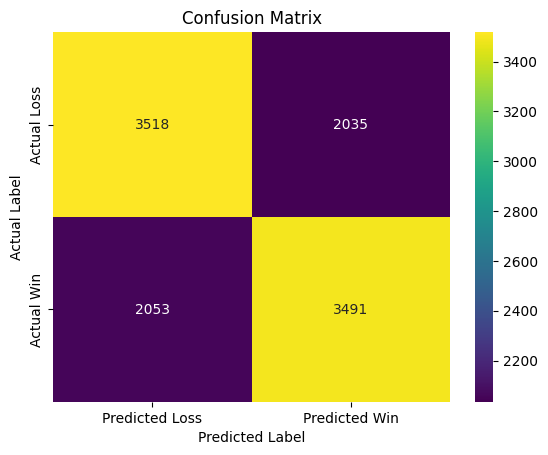

In [76]:
sns.heatmap(cm_rr, annot=True, fmt="d", cmap="viridis",
            xticklabels=["Predicted Loss", "Predicted Win"],
            yticklabels=["Actual Loss", "Actual Win"])

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

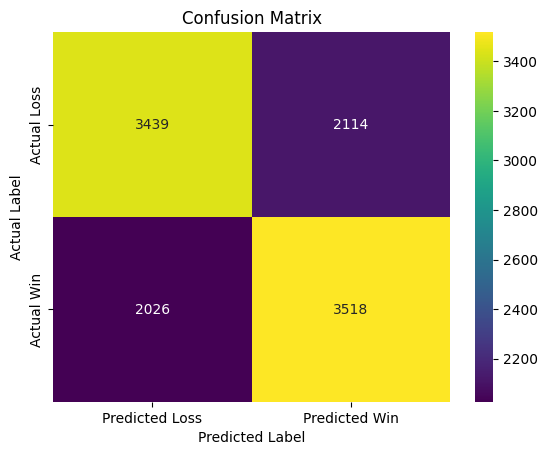

In [77]:
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="viridis",
            xticklabels=["Predicted Loss", "Predicted Win"],
            yticklabels=["Actual Loss", "Actual Win"])

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [90]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

TP = cm_rr[0][0]
FP = cm_rr[0][1]
FN = cm_rr[1][0]
TN = cm_rr[1][1]

accuracy = (TP + TN) / (TP + FP + FN + TN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1 = 2 * (precision * recall) / (precision + recall)

accuracy, precision, recall, f1

(0.6316121474272326,
 0.6335314244552495,
 0.6314844731646024,
 0.6325062927004675)

In [91]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

TP = cm_nb[0][0]
FP = cm_nb[0][1]
FN = cm_nb[1][0]
TN = cm_nb[1][1]

accuracy = (TP + TN) / (TP + FP + FN + TN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1 = 2 * (precision * recall) / (precision + recall)

accuracy, precision, recall, f1

(0.6269261962692619,
 0.6193048802449127,
 0.6292772186642269,
 0.6242512252677438)

As seen above, the Ridge Classifier performs slightly better than Naive Bayes classifier.